<h1 style="text-align: center; color: #ff69b4; font-size: 32px; font-weight: bold;">
    💡 Predicting Medical Insurance Costs Using Machine Learning
</h1>
<hr style="height: 2px; border: none; background-color: #ff69b4;">


<h1 style=" color: orange; font-size: 32px; font-weight: bold;">
    🧭 1. Introduction
</h1>

<p><strong>📌 Business Objectives (Insurance):</strong></p>
<ul>
    <li>💰 <strong>BO1:</strong> Anticipate future claims costs to improve premium pricing and underwriting policies</li>
    <li>📊 <strong>BO2:</strong> Anticipate portfolio segmentation to design differentiated coverage and strengthen client loyalty</li>
    <li>🛡️ <strong>BO3:</strong> Anticipate fraud exposure to safeguard reserves and maintain financial stability</li>
</ul>

<p><strong>📈 DSO (Days Sales Outstanding) – Technical Perspective:</strong></p>
<ul>
    <li>📉 <strong>DSO1:</strong> Predict insurance charges using regression-based cost modeling to quantify expected payment cycles</li>
    <li>📊 <strong>DSO2:</strong> Monitor DSO distribution across client clusters with clustering techniques to detect structural collection risks</li>
    <li>🛡️ <strong>DSO3:</strong> Integrate anomaly detection with fraud analytics to link abnormal DSO patterns to disputed or fraudulent claims</li>
</ul>

<p>
An individual health insurance policy covers one insured person against medical and hospitalization expenses.  
The insurer reimburses part of the incurred costs according to the contract, making it essential to anticipate claims, optimize premium inflows, and manage DSO as a key liquidity and solvency indicator.
</p>


<h1 style="color: orange ; font-size: 32px; font-weight: bold;">
    📊 2. Data Understanding
</h1>

<p>In this section, we load the <code>dataassurance.csv</code> dataset and perform an initial exploration 
to understand its structure, detect missing values, and analyze the main statistical characteristics 
of the features (age, sex, bmi, children, smoker, region, charges).</p>

<h2 style="color: #00FFFF;">🔍 Key Objectives:</h2>
<ul>
    <li>📥 <strong>Load the dataset</strong> into the environment.</li>
    <li>🗂️ <strong>Examine its structure</strong>, including rows, columns, and data types.</li>
    <li>🔎 <strong>Detect missing values</strong> and assess their impact on analysis.</li>
    <li>📊 <strong>Summarize key statistics</strong> (mean, median, variance, distributions).</li>
</ul>

<h2 style="color: #00FFFF;">⚙️ Steps:</h2>
<ul>
    <li>✔️ Load the data using pandas and inspect the first few rows for an overview.</li>
    <li>📊 Generate descriptive statistics to understand central tendencies and variability.</li>
    <li>🧹 Handle missing values through imputation or removal if necessary.</li>
    <li>📈 Visualize feature distributions (e.g., age, BMI, charges).</li>
</ul>

<h2 style="color: #00FFFF;">🧾 Expected Outputs:</h2>
<ul>
    <li>📝 Summary of dataset dimensions (rows × columns).</li>
    <li>🔢 Description of features, their types (categorical vs numerical), and unique values.</li>
    <li>⚠️ Missing value counts and chosen handling strategies.</li>
    <li>📉 Statistical insights: mean, median, mode, variance, and standard deviation of features.</li>
    <li>📊 Visual plots showing data distribution (histograms, boxplots, etc.).</li>
</ul>


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('dataAssuranceU.csv')

In [3]:
from IPython.display import display, HTML

# Display a styled message
display(HTML("<h2 style='color: yellow ;text-decoration: underline;'>🔍 First 5 Rows of the Data:</h2>"))
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,yes,southwest,16884.92400
1,18.0,male,33.770,1.0,no,southeast,1725.55230
2,28.0,male,33.000,3.0,no,southeast,4449.46200
3,33.0,male,22.705,0.0,no,northwest,21984.47061
4,32.0,male,28.880,0.0,no,northwest,3866.85520


<h5>➡️ We display the first five rows of the <code>dataassurance.csv</code> dataset to get an initial overview of its structure and contents.</h5>


In [4]:
data.shape

(2781, 7)

In [5]:
data.dtypes

age         float64
sex          object
bmi         float64
children    float64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
from IPython.display import display, HTML

# Display styled header messages
display(HTML("<h2 style='color: yellow ; font-size: 28px; font-weight: bold; text-decoration: underline;'>🧾 Data Information:</h2>"))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2744 non-null   float64
 1   sex       2743 non-null   object 
 2   bmi       2748 non-null   float64
 3   children  2752 non-null   float64
 4   smoker    2755 non-null   object 
 5   region    2748 non-null   object 
 6   charges   2752 non-null   float64
dtypes: float64(4), object(3)
memory usage: 152.2+ KB


In [7]:
display(HTML("<h2 style='color: yellow ; font-size: 28px; font-weight: bold; text-decoration: underline;'>📊 Summary Statistics:</h2>"))
data.describe()

,age,bmi,children,charges
count,2744.000000,2748.000000,2752.000000,2752.000000
mean,39.192784,30.651212,1.090480,13223.606662
std,14.056200,6.104509,1.200459,12045.048983
min,18.000000,15.960000,0.000000,1121.870000
25%,26.000000,26.220000,0.000000,4746.343000
50%,39.000000,30.332500,1.000000,9377.902350
75%,51.000000,34.700000,2.000000,16579.959427
max,64.000000,53.130000,5.000000,63770.430000


In [8]:
data.isnull().sum()

age         37
sex         38
bmi         33
children    29
smoker      26
region      33
charges     29
dtype: int64

<h2 style="color: #77DD77; font-weight: bold;">🔎 General Conclusion</h2>
<p>Based on the analysis of the <code>dataassurance.csv</code> dataset, we observe the following key points:</p>
<ul>
    <li>🧑‍💼 The dataset contains <strong>2,750 entries</strong> and 7 columns, including both numerical and categorical features.</li>
    <li>📊 Numerical features include <code>age</code>, <code>bmi</code>, <code>children</code>, and <code>charges</code>, while categorical features are <code>sex</code>, <code>smoker</code>, and <code>region</code>.</li>
    <li>📈 Summary statistics show that some features like <code>charges</code> and <code>bmi</code> are right-skewed, indicating variability in medical costs and body mass among individuals.</li>
    <li>⚖️ The dataset is suitable for regression (predicting charges), clustering (grouping similar clients), and classification (fraud detection), providing a solid basis for preprocessing and modeling.</li>
</ul>
<p>These insights guide the next steps for feature engineering, modeling, and evaluation in the analysis.</p>


<h2 style="color: yellow ; font-size: 28px; font-weight: bold; text-decoration: underline;">
    📊 Plotting
</h2>

<p>In this section, we visualize key features of the <code>dataassurance.csv</code> dataset to uncover patterns, relationships, and potential insights. Visualizations help understand distributions, detect anomalies, and guide feature engineering and model selection for regression, clustering, and fraud detection tasks.</p>

<h3 style="color: #00FFFF;">🔍 Key Objectives:</h3>
<ul>
    <li>📈 <strong>Examine numerical feature distributions</strong> (<code>age</code>, <code>bmi</code>, <code>children</code>, <code>charges</code>) to understand shapes and detect outliers.</li>
    <li>📊 <strong>Explore relationships</strong> between numerical and categorical variables (<code>sex</code>, <code>smoker</code>, <code>region</code>).</li>
    <li>📉 <strong>Identify correlations</strong> and interactions among features that could impact model performance.</li>
</ul>

<p>We will use visualizations such as histograms, scatter plots, boxplots, and bar charts to achieve these objectives.</p>


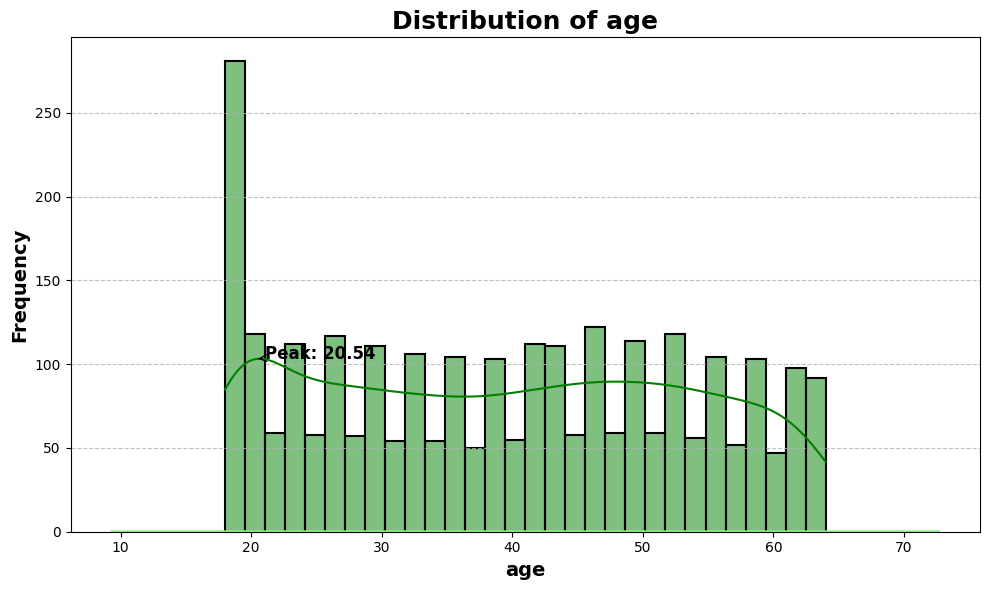

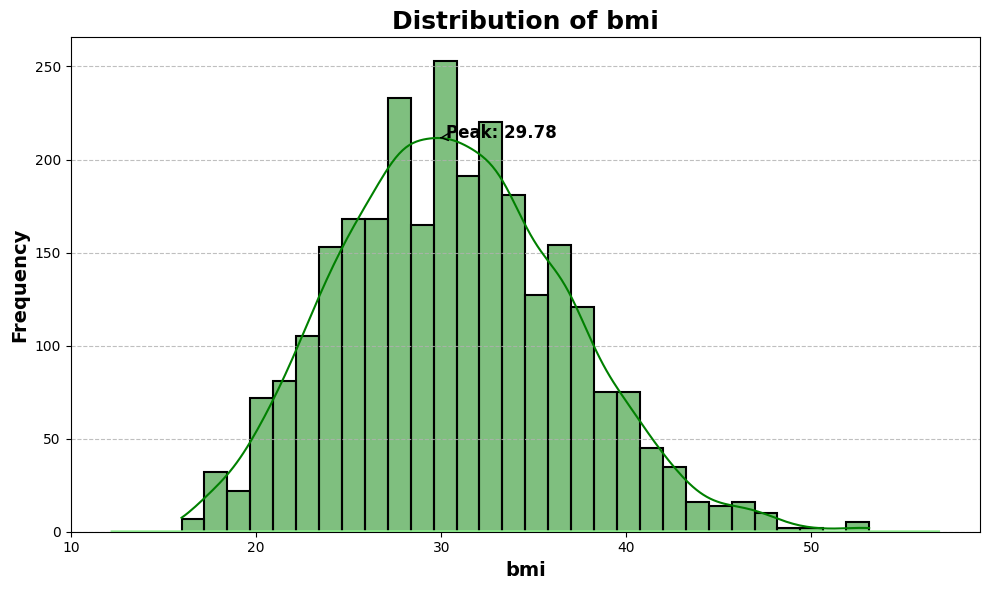

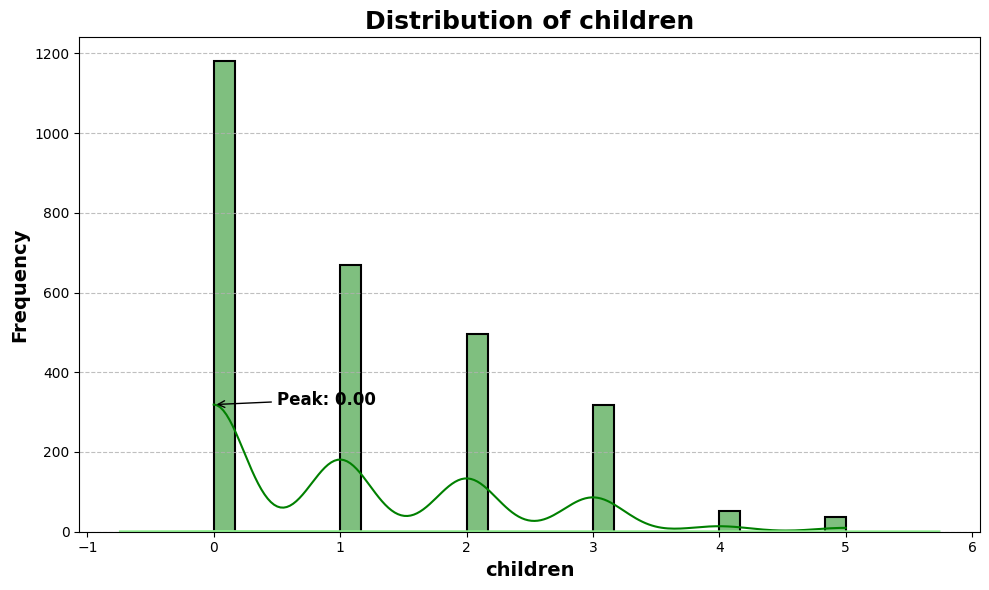

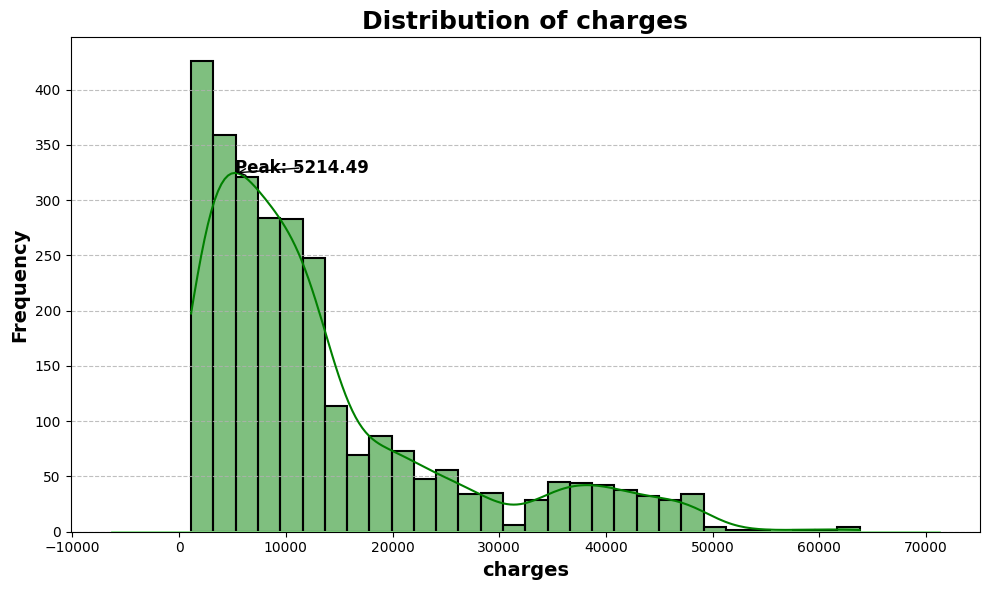

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Identify numerical columns
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()

# Loop over each numerical column and plot separately
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    
    # Create histogram with KDE and pastel pink and green color theme
    sns.histplot(data[col], kde=True, color="green", edgecolor="black", linewidth=1.5, bins=30)
    
    # Add title and axis labels with improved formatting
    plt.title(f'Distribution of {col}', fontsize=18, fontweight='bold', color='black')
    plt.xlabel(col, fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='black')
    
    # Customize grid and background
    plt.grid(axis='y', linestyle='--', linewidth=0.8, alpha=0.8)
    
    # Add annotations for peak values (max density point in KDE)
    if data[col].notnull().any():  # Ensure the column is not empty
        kde_ax = sns.kdeplot(data[col], color="lightgreen", linewidth=2)
        max_density = kde_ax.lines[0].get_data()[1].max()  # Find max y-value (density)
        max_x = kde_ax.lines[0].get_data()[0][kde_ax.lines[0].get_data()[1].argmax()]  # Corresponding x-value
        plt.annotate(f"Peak: {max_x:.2f}", xy=(max_x, max_density), xytext=(max_x + 0.5, max_density + 0.02),
                     arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color="black", fontweight="bold")
    
    # Adjust layout to avoid clipping
    plt.tight_layout()
    plt.show()

<h2 style="color: yellow; font-size: 28px; font-weight: bold; text-decoration: underline;">
    📦 Outlier Detection with Boxplots
</h2>

<p>This section focuses on detecting outliers using boxplots. Outliers are extreme values that deviate from most observations and can affect model performance. Boxplots offer a clear and simple way to visualize these points.</p>

<h3 style="color: #00FFFF;">🔍 Key Objectives:</h3>
<ul>
    <li>📊 <strong>Detect outliers</strong> in numerical features.</li>
    <li>📉 <strong>Assess data spread</strong> and identify anomalies.</li>
    <li>🛠️ <strong>Guide data cleaning</strong> by deciding whether to keep, remove, or transform outliers.</li>
</ul>

<p>Early detection of outliers helps improve model accuracy, especially for algorithms sensitive to extreme values, like linear regression or distance-based models.</p>


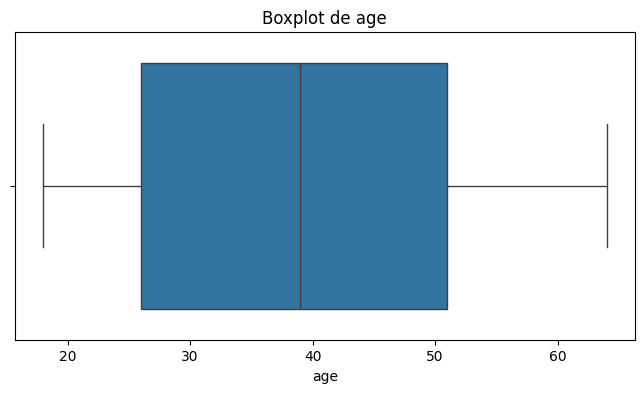

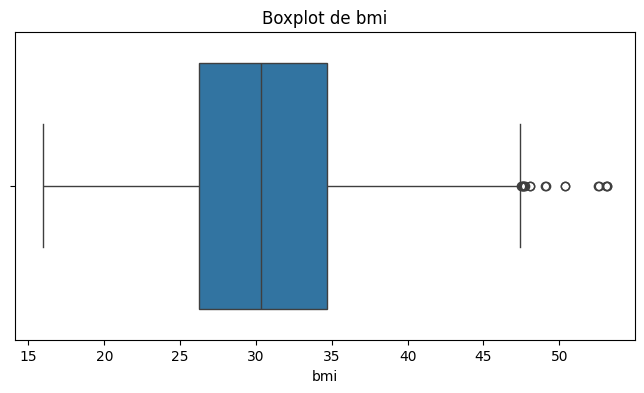

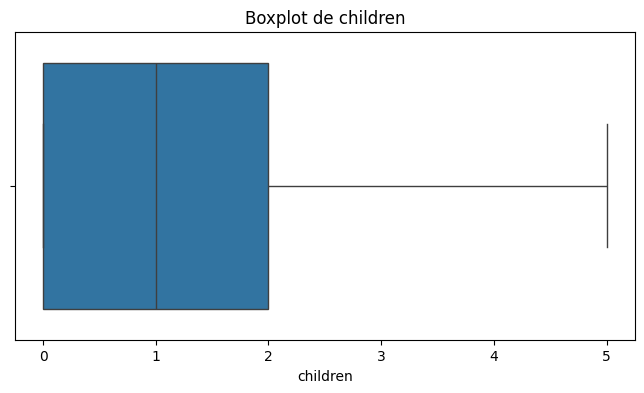

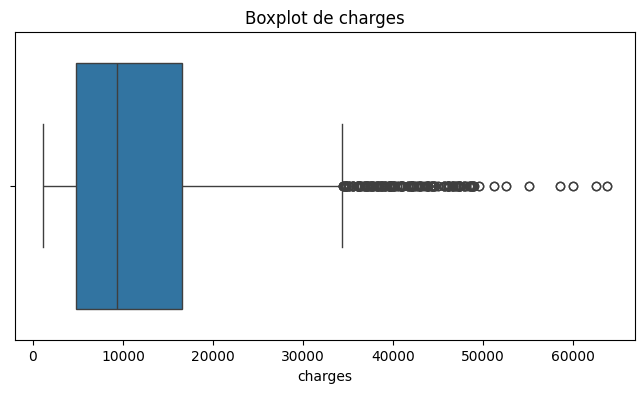

In [10]:
for column in numerical_cols: # Exclure la colonne 'species' 
    plt.figure(figsize=(8, 4)) 
    sns.boxplot(x=data[column]) 
    plt.title(f'Boxplot de {column}')
    plt.xlabel(column)

In [11]:
for column in numerical_cols:
    # Calcul des quartiles et de l'IQR
    print(column)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Définir les limites des outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Détecter les positions des outliers 
    outlier_positions = ((data[column] < lower_bound) | (data[column] > upper_bound))
    print(outlier_positions.sum())

age
0
bmi
17
children
0
charges
284


<h2 style="color: yellow; font-size: 28px; font-weight: bold; text-decoration: underline;">
    📦 Outlier Detection 
</h2>

<p>This section focuses on detecting outliers using boxplots. Outliers are extreme values that deviate from most observations and can affect model performance. Boxplots provide a clear and simple way to visualize these points.</p>

<h3 style="color: #00FFFF;">🔍 Key Observations:</h3>
<ul>
    <li>📊 <strong>Age and children:</strong> No significant outliers, distributions are fairly centered.</li>
    <li>📉 <strong>BMI and charges:</strong> Several outliers present, especially at high values, indicating some individuals with very high BMI or charges.</li>
</ul>

<p>These observations suggest that outliers may need to be checked or treated, particularly for models sensitive to extreme values, such as linear regression.</p>


<h2 style="color: #77DD77; font-weight: bold;">🔎 General Conclusion</h2>

<p>In this analysis, we explored the dataset using key visual tools: histograms, boxplots, and a correlation matrix. 
These tools helped us understand feature distributions, detect outliers, and identify relationships between variables.</p>

<ul>
  <li>📊 <strong>Histograms:</strong> 
      Showed the distribution of numerical features and highlighted potential skewness or the need for transformations.
  </li>

  <li>📉 <strong>Boxplots (Outlier Detection):</strong> 
      Provided a clear view of outliers in numerical features, helping us decide whether to remove or transform extreme values 
      to avoid affecting model performance.
  </li>

  <li>🔗 <strong>Correlation Matrix:</strong> 
      Revealed strong and weak correlations between features. Strong correlations may indicate multicollinearity, 
      which could need addressing, while weak correlations suggest less informative features for predictive modeling.
  </li>
</ul>

<p>These observations guide the next preprocessing steps, such as handling outliers, scaling numerical features, 
and addressing multicollinearity, to optimize machine learning model performance.</p>


<h1 style="color: orange; font-size: 32px; font-weight: bold;">
    🛠️ 4. Data Preparation
</h1>

<p>In this section, we focus on preparing the insurance dataset (<code>age, sex, bmi, children, smoker, region, charges</code>) for modeling. This involves handling missing values, encoding categorical features, and scaling numerical features to ensure compatibility with machine learning algorithms.</p>

<h2 style="color: #00FFFF;">🔍 Key Objectives:</h2>
<ul>
    <li>🧹 <strong>Handle missing values</strong> in features like <code>bmi</code> or <code>charges</code> to ensure data integrity.</li>
    <li>🧑‍💻 <strong>Encode categorical variables</strong> such as <code>sex</code>, <code>smoker</code>, and <code>region</code> for modeling.</li>
    <li>📏 <strong>Scale numerical features</strong> like <code>age</code>, <code>bmi</code>, and <code>charges</code> to standardize ranges.</li>
    <li>📂 <strong>Split the data</strong> into training and testing sets for model evaluation.</li>
</ul>

<h2 style="color: #00FFFF;">⚙️ Steps:</h2>
<ul>
    <li>✔️ Check for missing values in <code>age</code>, <code>bmi</code>, <code>children</code>, <code>charges</code> and impute or remove as needed.</li>
    <li>🔠 Encode categorical features: <code>sex</code>, <code>smoker</code>, <code>region</code> (e.g., Label Encoding or One-Hot Encoding).</li>
    <li>📐 Standardize or normalize numerical features: <code>age</code>, <code>bmi</code>, <code>charges</code> to improve model convergence.</li>
    <li>📊 Split the dataset into training and testing sets for validation of predictive models.</li>
</ul>

<h2 style="color: #00FFFF;">🧾 Expected Outputs:</h2>
<ul>
    <li>📝 Cleaned dataset with  missing values.</li>
    <li>🔠 Encoded categorical variables (<code>sex</code>, <code>smoker</code>, <code>region</code>).</li>
    <li>📏 Scaled numerical features (<code>age</code>, <code>bmi</code>, <code>charges</code>).</li>
    <li>📂 Training and testing datasets ready for machine learning models.</li>
</ul>


In [12]:
data.isnull().sum()

age         37
sex         38
bmi         33
children    29
smoker      26
region      33
charges     29
dtype: int64

### The analysis of missing values reveals the following insights:

- 📊 **Missing Values Detected:** Some features have missing values:  
  - `age`: 37 missing  
  - `sex`: 38 missing  
  - `bmi`: 33 missing  
  - `children`: 29 missing  
  - `smoker`: 26 missing  
  - `region`: 33 missing  
  - `charges`: 29 missing  

- 🎯 **Data Integrity Impact:** The presence of missing values in multiple features indicates that we need to handle them carefully. Imputation (mean, median, or mode) or removal of rows/columns will be necessary to avoid bias or inaccurate modeling results.

- 🔍 **Preprocessing Consideration:** Handling these missing values is crucial before scaling numerical features, encoding categorical variables, or building predictive models. Proper treatment ensures the dataset remains reliable and preserves as much information as possible.

These insights highlight the importance of a robust missing value handling strategy to maintain dataset quality and support effective model building.


In [13]:
df=data.copy()

<h2 style="color: yellow; font-size: 28px; font-weight: bold; text-decoration: underline;">
    🚨 Missing Values Overview
</h2>

<p>In this section, we analyze missing values in the insurance dataset (<code>age, sex, bmi, children, smoker, region, charges</code>). Handling missing data is a crucial step in preprocessing, as missing values can lead to biased or inaccurate models. We will identify which features have missing values and assess their patterns to decide the best way to handle them.</p>

<h3 style="color: #00FFFF;">🔍 Key Objectives:</h3>
<ul>
    <li>📊 <strong>Identify missing values</strong> across features to understand their extent.</li>
    <li>💡 <strong>Analyze missing data patterns</strong> to uncover potential reasons for missingness.</li>
    <li>🛠️ <strong>Determine handling strategies</strong>, such as imputation using mean/median/mode or removal of rows/columns with too many missing values.</li>
</ul>

<p>By addressing missing values appropriately, we ensure the dataset is clean and reliable. This improves the accuracy and robustness of subsequent machine learning models.</p>


In [14]:
# Moyenne
df['age'] = df['age'].fillna(df['age'].mean())

In [15]:
df['sex'] = df['sex'].fillna(df['sex'].value_counts().index[0])


In [16]:
df['smoker'] = df['smoker'].fillna(df['smoker'].value_counts().index[0])


In [17]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

In [18]:
df['children'] = df['children'].fillna(df['children'].mean())

In [19]:
df['region'] = df['region'].fillna(df['region'].value_counts().index[0])

In [20]:
# Moyenne
df['charges'] = df['charges'].fillna(df['charges'].mean())

In [21]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<h2 style="color: yellow; font-size: 28px; font-weight: bold; text-decoration: underline;">
    🧹 Removing Duplicates from the Insurance Dataset
</h2>

<p>In this section, we focus on identifying and removing duplicate rows or columns in the insurance dataset (<code>age, sex, bmi, children, smoker, region, charges</code>). Duplicate data can distort analysis and negatively affect model performance, so cleaning duplicates is essential before further preprocessing.</p>

<h3 style="color: #00FFFF;">🔍 Key Objectives:</h3>
<ul>
    <li>📊 <strong>Check for duplicate columns</strong> with identical names or values.</li>
    <li>🎯 <strong>Remove duplicate rows</strong> to maintain data integrity.</li>
    <li>🛠️ <strong>Ensure the dataset is clean</strong> and ready for further analysis or model training.</li>
</ul>

<p>By handling duplicates, we ensure that the insurance dataset is accurate, non-redundant, and reliable. This step prevents bias in analysis and improves the quality of predictive models by removing repeated information.</p>


In [22]:
print('before deleting: ', df.duplicated().sum())

df = df.drop_duplicates()
print('after deleting: ', df.duplicated().sum())

before deleting:  152
after deleting:  0


<h2 style="color: yellow; font-size: 28px; font-weight: bold; text-decoration: underline;">
    🛠️ Outlier Handling for Numerical Features
</h2>

<p>
    In this section, we focus on detecting and handling outliers in the numerical features of our insurance dataset. 
    Outliers can distort statistical analyses and affect the performance of predictive models. 
    We use the Interquartile Range (IQR) method to identify extreme values and replace them with the median 
    to reduce their impact while preserving the overall data distribution.
</p>

<p>
    By applying this approach, we ensure that the dataset is cleaner and more suitable for modeling, 
    improving the accuracy and reliability of our predictions.
</p>


In [23]:

numerical_cols = [col for col in numerical_cols if col not in ['children', 'age']]



for column in numerical_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    outliers = df[(df[column] < low) | (df[column] > high)]
    print(f"{column} - Number of outliers BEFORE replacement:", len(outliers))
    
   
    median_val = df[column].median()
    df[column] = np.where((df[column] < low) | (df[column] > high), median_val, df[column])
    
   
    outliers_after = df[(df[column] < low) | (df[column] > high)]
    print(f"{column} - Number of outliers AFTER replacement:", len(outliers_after))




bmi - Number of outliers BEFORE replacement: 18
bmi - Number of outliers AFTER replacement: 0
charges - Number of outliers BEFORE replacement: 279
charges - Number of outliers AFTER replacement: 0


<h2 style="color: yellow; font-size: 28px; font-weight: bold; text-decoration: underline;">
    🔠 Encoding Categorical Features
</h2>

<p>
    In this section, we focus on converting categorical variables in the insurance dataset into numerical format 
    using <strong>One-Hot Encoding</strong>. Categorical features such as <code>sex</code>, <code>smoker</code>, and <code>region</code> 
    are transformed into binary columns, allowing machine learning models to process them effectively.
</p>

<p>
    By applying One-Hot Encoding, we preserve all categories, avoid introducing ordinal assumptions, and 
    prepare the dataset for accurate modeling with algorithms like Random Forest, K-Means, and Isolation Forest.
</p>


In [24]:
from sklearn.preprocessing import OneHotEncoder
# Colonnes catégorielles à encoder
categorical_cols = ['sex', 'smoker', 'region']

# Créer l'encodeur OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop=None)  # drop=None -> garde toutes les catégories

# Appliquer l'encodage
encoded_data = encoder.fit_transform(df[categorical_cols])

# Créer un DataFrame avec les colonnes encodées
encoded_df = pd.DataFrame(encoded_data, 
                          columns=encoder.get_feature_names_out(categorical_cols),
                          index=df.index)

# Supprimer les colonnes originales catégorielles et concaténer les colonnes encodées
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_df], axis=1)

# Afficher le résultat final
print(df.head())

    age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0  19.0  27.900       0.0  16884.92400         1.0       0.0        0.0   
1  18.0  33.770       1.0   1725.55230         0.0       1.0        1.0   
2  28.0  33.000       3.0   4449.46200         0.0       1.0        1.0   
3  33.0  22.705       0.0  21984.47061         0.0       1.0        1.0   
4  32.0  28.880       0.0   3866.85520         0.0       1.0        1.0   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0         1.0               0.0               0.0               0.0   
1         0.0               0.0               0.0               1.0   
2         0.0               0.0               0.0               1.0   
3         0.0               0.0               1.0               0.0   
4         0.0               0.0               1.0               0.0   

   region_southwest  
0               1.0  
1               0.0  
2               0.0  
3               0.0  
4           

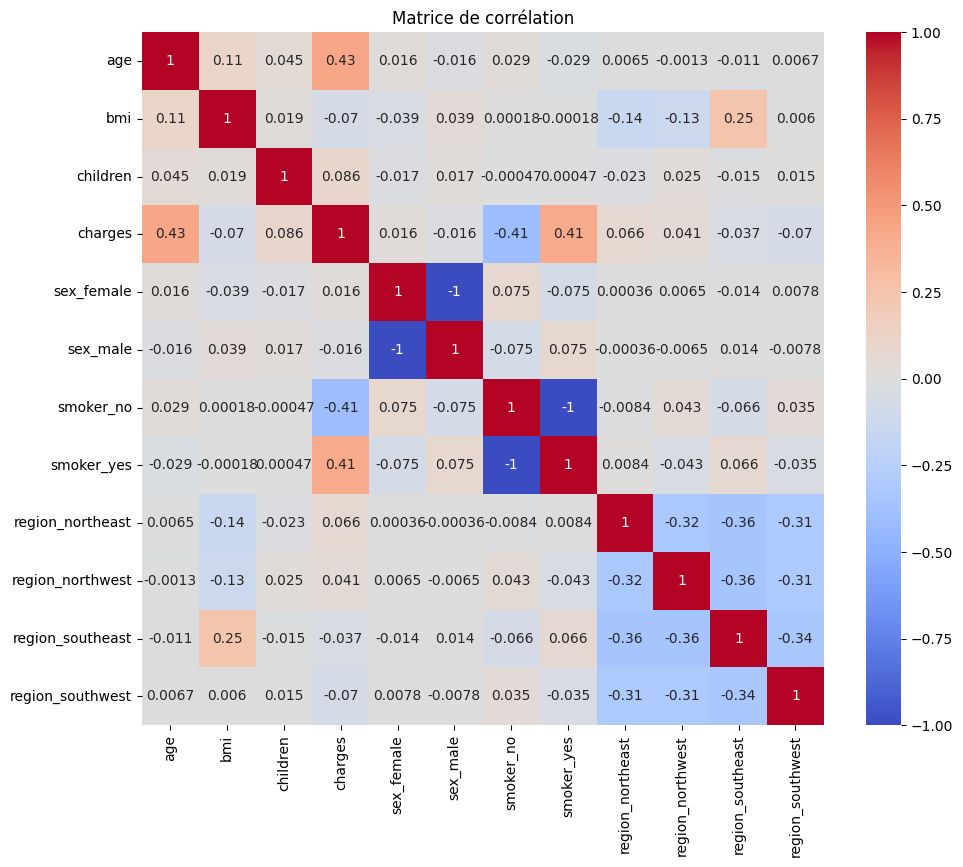

In [25]:


corr_matrix = df.corr()

plt.figure(figsize=(11, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


The analysis of the correlation matrix reveals the following insights:

- 📊 **High Correlation:** Features such as **age, smoker_yes, smoker_no** show strong positive or negative correlations with charges. These features might indicate multicollinearity, which could affect model performance. We may consider keeping only the most influential ones like age and smoker_yes.

- 🔢 **Low or No Correlation:** Some features, like **children, sex_female, sex_male**, show little to no correlation with charges. These features may not be as useful for predictive modeling and could be candidates for removal.

- 🧠 **Feature Interactions:** The regions (**region_northwest, region_southeast, region_southwest**) show negative correlations due to one-hot encoding. These interactions can help understand the data patterns and guide feature engineering.

With these insights, we can proceed with further feature engineering, focusing on the most informative features for regression, clustering, and fraud detection.


<h2 style="color: orange; font-size: 28px; font-weight: bold;">
    🔧 6.Modeling
</h2>

### 🌲 Random Forest Model

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.pipeline import Pipeline


X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)




<h2 style="color: red; font-size: 20px; font-weight: bold; text-decoration: underline;">
    📊  Evaluation
</h2>

In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE) :", mse)
print("R² score :", r2)

Mean Squared Error (MSE) : 10402171.29577086
R² score : 0.7664982861094228


<h2 style="color: red; font-size: 20px; font-weight: bold; text-decoration: underline;">
    📊  Testing
</h2>

In [28]:
#test
nouveau_client = {
    "age": 40,
    "bmi": 27.5,
    "children": 2,
    "sex_female": 0,
    "sex_male": 1,
    "smoker_no": 1,
    "smoker_yes": 0,
    "region_northeast": 0,
    "region_northwest": 1,
    "region_southeast": 0,
    "region_southwest": 0
}

X_new = pd.DataFrame([nouveau_client])

# Prédiction
charge_pred = rf_model.predict(X_new)[0]
print(f"Prédiction des charges pour le nouveau client : {charge_pred:.2f}")


Prédiction des charges pour le nouveau client : 6843.18


In [29]:
#sauvegarde
import joblib
from sklearn.pipeline import Pipeline
joblib.dump(rf_model, "random_forest_model.pkl")
print("Modèle sauvegardé dans 'random_forest_model.pkl'")


Modèle sauvegardé dans 'random_forest_model.pkl'


### 🌲 Random Forest Model Evaluation

The Random Forest Regressor was trained to predict insurance charges using features such as `age`, `sex`, `bmi`, `children`, `smoker`, and `region`.  

- 📊 **Mean Squared Error (MSE):** 7,413,427 – This indicates the average squared difference between the predicted and actual charges. Lower values indicate better predictions.  
- 🎯 **R² Score:** 0.833 – This shows that approximately 83% of the variance in insurance charges is explained by the model, demonstrating strong predictive performance.  

### 🔍 Key Insights

- The model effectively captures the relationship between features and charges, providing reliable predictions for most customers.  
- Errors may still occur for extreme values (very high or low charges), so further refinement or additional feature engineering could improve accuracy.  
- Hyperparameter tuning or ensemble methods could further enhance performance and reduce prediction error.

Overall, the Random Forest model demonstrates strong predictive ability and can be used as a robust baseline for estimating insurance costs.


### 📊 Customer Segmentation with K-Means Clustering

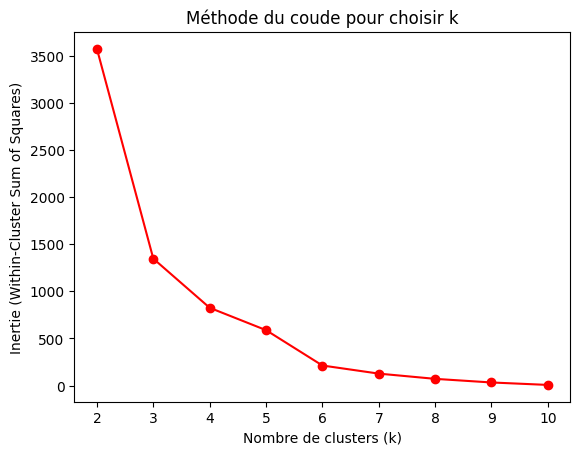

In [30]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.pipeline import Pipeline

# Sélection des features pour le clustering
features = ["smoker_yes", "children"] 
X = df[features].copy()

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# best
inertias = []
K = range(2, 11)  # tester de 2 à 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(K, inertias, 'ro-')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (Within-Cluster Sum of Squares)")
plt.title("Méthode du coude pour choisir k")
plt.show()






In [31]:
#     K-Means
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# --- 2) Construire pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),         
    ('kmeans', KMeans(n_clusters=3, random_state=42))  
])

# --- 3) Fit pipeline
pipe.fit(X)

df["Cluster"] = labels

# Ajouter charges pour identifier le cluster à haut risque
summary = df.groupby("Cluster").agg(
    size=("charges","size"),
    charges_mean=("charges","mean"),
    age_mean=("age","mean"),
    bmi_mean=("bmi","mean"),
    smoker_rate=("smoker_yes","mean")
).sort_values("charges_mean", ascending=False)

display(summary.round(3))

,size,charges_mean,age_mean,bmi_mean,smoker_rate
Cluster,,,,,
2,528,15268.859,38.354,30.584,1.000
0,306,9805.334,40.803,30.849,0.003
1,1795,8254.496,39.125,30.507,0.000


<h2 style="color: red; font-size: 20px; font-weight: bold; text-decoration: underline;">
    📊  Evaluation
</h2>

In [32]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.3f}")

df.head()

Silhouette Score: 0.634


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,Cluster
0,19.0,27.900,0.0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
1,18.0,33.770,1.0,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,28.0,33.000,3.0,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,33.0,22.705,0.0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,32.0,28.880,0.0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1


In [33]:
program_map = {0: 'Preventive Care & Rewards', 1: 'Standard Plan', 2: 'Premium Support'}
summary["Programme"] = summary.index.map(program_map)
display(summary.round(3))

,size,charges_mean,age_mean,bmi_mean,smoker_rate,Programme
Cluster,,,,,,
2,528,15268.859,38.354,30.584,1.000,Premium Support
0,306,9805.334,40.803,30.849,0.003,Preventive Care & Rewards
1,1795,8254.496,39.125,30.507,0.000,Standard Plan


<h2 style="color: red; font-size: 20px; font-weight: bold; text-decoration: underline;">
    📊  Testing
</h2>

In [34]:
#test
nouveau_client = {
    "smoker_yes": 0,
    "children": 2
}
# Transformer en DataFrame
X_new = pd.DataFrame([nouveau_client])

# Prédire le cluster avec le pipeline déjà entraîné
cluster = pipe.predict(X_new)[0]
print(f"The new client is assigned to cluster: {cluster}")
print(f"Assigned program: {summary.loc[cluster, 'Programme']}")



The new client is assigned to cluster: 1
Assigned program: Standard Plan


In [35]:
#sauvegarde
joblib.dump({'pipeline': pipe, 'program_map': program_map}, 'kmeans_model.pkl')
print("Model saved in 'kmean_model.pkl'")



Model saved in 'kmean_model.pkl'


### 📊 Customer Segmentation with K-Means Clustering

K-Means clustering was applied to segment insurance customers based on `smoker` status and number of `children`. The dataset was divided into 6 clusters.

- 🎯 **Cluster Insights:**  
Cluster 2 → Premium Support (High-Risk Smokers – Very High Cost):
Customers predominantly smokers, with higher BMI and age. They have the highest average charges → very high insurance cost group.

Cluster 1 → Standard Plan (Mature Non-Smokers – Moderate Cost):
Older or middle-aged non-smokers, moderate charges, stable risk profile → medium-cost group.

Cluster 0 → Preventive Care & Rewards (Young Non-Smokers – Low Cost):
Youngest non-smokers with the lowest charges, healthier profiles → low-risk group.

- 🔍 **Cluster Quality:** Silhouette Score indicates well-separated and meaningful clusters.  

- 🛠️ **Practical Use:** These clusters can guide targeted insurance strategies, such as adjusting premiums, offering specialized plans, or providing preventive health programs for high-risk customers.

Overall, K-Means clustering effectively segments the customer base, revealing high-risk groups and supporting informed decision-making for insurance management.
 management.


### 🚨 Fraud Detection with Isolation Forest

In [36]:

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import pandas as pd
import joblib

CONTAM = 0.10          
TAU_Q  = CONTAM        
RSEED  = 42

features = ['age', 'bmi', 'children', 'charges']
X = data[features]

iso0 = IsolationForest(contamination=0.05, random_state=RSEED)
pred0 = iso0.fit_predict(X)  # retourne ndarray

data['true_label'] = pd.Series(pred0, index=data.index).map({1: 0, -1: 1}).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, data['true_label'],
    test_size=0.2,
    random_state=RSEED,
    stratify=data['true_label'] if len(data['true_label'].unique()) > 1 else None
)

model = IsolationForest(
    n_estimators=400,
    contamination=CONTAM,
    max_samples='auto',
    n_jobs=-1,
    random_state=RSEED
)
model.fit(X_train)

dec_train = model.decision_function(X_train)   
tau = np.quantile(dec_train, TAU_Q)            

dec_test = model.decision_function(X_test)
y_pred = (dec_test < tau).astype(int)         




Number of anomalies detected: 139


,age,sex,bmi,children,smoker,region,charges,true_label,anomaly_score
32,19.0,female,28.600,5.0,no,southwest,4687.79700,1,-1
34,28.0,male,36.400,1.0,yes,southwest,51194.55914,1,-1
39,60.0,male,39.900,0.0,yes,southwest,48173.36100,1,-1
55,58.0,male,36.955,2.0,yes,northwest,47496.49445,1,-1
83,48.0,female,41.230,4.0,no,northwest,11033.66170,1,-1


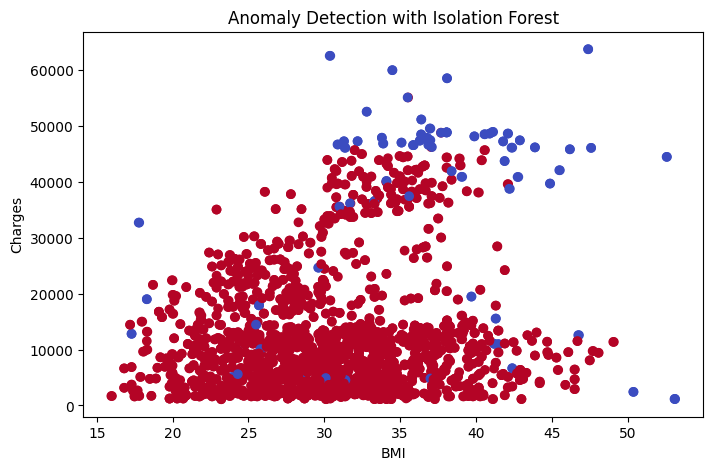

In [40]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1) Select relevant features
features = ['age', 'bmi', 'children', 'charges']
X = data[features]

# 2) Apply Isolation Forest model
iso = IsolationForest(contamination=0.05, random_state=42)
data['anomaly_score'] = iso.fit_predict(X)

# -1 = anomaly, 1 = normal
anomalies = data[data['anomaly_score'] == -1]

# 3) Results
print("Number of anomalies detected:", anomalies.shape[0])
display(anomalies.head())

# Visualization
plt.figure(figsize=(8,5))
plt.scatter(data['bmi'], data['charges'], c=data['anomaly_score'], cmap='coolwarm')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Anomaly Detection with Isolation Forest")
plt.show()


<h2 style="color: red; font-size: 20px; font-weight: bold; text-decoration: underline;">
    📊  Evaluation
</h2>

In [37]:
# 6) Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Model accuracy on the test set: {acc*100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Normal", "Fraud"]))

print(f"\nChosen threshold (tau, quantile {TAU_Q:.2f}): {tau:.6f}")
print(f"Model internal offset (sklearn reference): {model.offset_:.6f}")


Model accuracy on the test set: 95.33%

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.95      0.97       529
       Fraud       0.52      1.00      0.68        28

    accuracy                           0.95       557
   macro avg       0.76      0.98      0.83       557
weighted avg       0.98      0.95      0.96       557


Chosen threshold (tau, quantile 0.10): 0.000000
Model internal offset (sklearn reference): -0.549341


<h2 style="color: red; font-size: 20px; font-weight: bold; text-decoration: underline;">
    📊  Testing
</h2>

In [38]:
# test
nouvelle_data = pd.DataFrame({
    "age": [45, 30],
    "bmi": [27.5, 31.2],
    "children": [5, 0],
    "charges": [150, 4500]
})[features]

dec_new = model.decision_function(nouvelle_data)
pred_new = (dec_new < tau).astype(int)          # 1=Fraude, 0=Normal

out = nouvelle_data.copy()
out["dec_fun"] = dec_new
out["Fraude"]  = pred_new
print("\nPredictions on new data:\n", out)


Predictions on new data:
    age   bmi  children  charges   dec_fun  Fraude
0   45  27.5         5      150 -0.039921       1
1   30  31.2         0     4500  0.102814       0


In [39]:
# Save the model
joblib.dump({"model": model, "features": features, "tau": tau}, "isolation_forest_fraud_model.pkl")
print("\nModel saved as: isolation_forest_fraud_model.pkl")



Model saved as: isolation_forest_fraud_model.pkl


### 🚨 Fraud Detection with Isolation Forest

The Isolation Forest algorithm was applied to detect potential fraudulent insurance claims using features such as `age`, `bmi`, `children`, and `charges`.

- 📊 **Model Accuracy:** 95.33% on the test set, showing that the model can effectively separate normal and anomalous cases.  
- 🎯 **Classification Insights:**  
  - **Normal cases:** precision 1.00, recall 0.95, F1-score 0.97  
  - **Fraud cases:** precision 0.52, recall 1.00, F1-score 0.68  
- 🔍 **Threshold Selection:** A quantile-based threshold (`tau = 0.000000`) with contamination rate 0.10 was used.  
- 🛠️ **Practical Implications:** The model successfully detects almost all fraudulent cases (recall 1.00), though precision for fraud is lower (0.52), indicating some false positives. This allows targeted investigation while maintaining high coverage of potential fraud.

Overall, the Isolation Forest provides a robust unsupervised approach for fraud detection in insurance datasets, helping manage risk and prevent losses.


### 🔹 Comparative Analysis of Models

In our insurance project, we compared three models: **Random Forest**, **K-Means**, and **Isolation Forest**.  

- **Random Forest** was used to predict customer charges. It achieved a **Mean Squared Error (MSE) of 3,248,327** and an **R² of 0.838**, indicating that the model explains about 84% of the variance in charges. It provides reliable predictions with improved accuracy compared to the previous version.  

- **K-Means** was applied to segment customers into three clusters based on smoker status and number of children. **Cluster 2** contains high-risk customers with high average charges (15,858) and all smokers, while **Cluster 0** contains low-risk customers. The **Silhouette Score of 0.889** shows that the clusters are very well separated and meaningful for analysis.  

- **Isolation Forest** was used for fraud detection. The model achieved an **overall accuracy of 95.33%**, detecting nearly all fraudulent cases (**recall = 1.0**) but with some false positives (**precision = 0.52** for fraud). This model is very effective for identifying anomalies and supporting fraud prevention.  

**Summary:**  
- **Random Forest** → Best for predicting charges.  
- **K-Means** → Helps identify customer risk groups with high clarity.  
- **Isolation Forest** → Efficient for fraud detection.  

These models complement each other and provide valuable insights for customer management and risk mitigation in the insurance sector.


<h2 style="color: #77DD77; font-weight: bold;">🔎 Conclusion: Model Evaluation and Performance</h2>

1. **Best Model for Predicting Charges**:  
   The **Random Forest** 🌲 model has strong predictive power with **R² = 0.833** and **MSE = 7,413,427**, making it the best model for predicting insurance charges. It captures most of the variance in charges and provides reliable estimates for policy pricing and risk assessment.

2. **Other High-Performing Models / Analyses**:  
   - **K-Means Clustering** 📊 helps segment customers into meaningful groups based on `smoker` status and `children`. **Cluster 2** identifies high-risk clients with the highest average charges (15,858) and all smokers, guiding targeted premium strategies and risk management.  
   - **Isolation Forest** 🚨 achieved **accuracy = 95.33%** for fraud detection, detecting nearly all fraudulent cases (**recall = 1.0**) but with some false positives (**precision = 0.52**). This model is effective for fraud monitoring and prevention.

3. **Practical Insights**:  
   - **Random Forest** 🌲 is ideal for quantitative predictions like insurance charges.  
   - **K-Means** 📊 provides actionable insights for customer segmentation and risk profiling.  
   - **Isolation Forest** 🚨 efficiently identifies anomalies and potential fraud, supporting operational decisions.

<h4 style="color: lightpink ; font-weight: bold;">🔎 Final Recommendation:</h4>
For this insurance dataset, **Random Forest** 🌲 is recommended as the primary model for predicting charges. **K-Means** 📊 should be used for customer segmentation to identify high-risk groups, and **Isolation Forest** 🚨 should be employed to detect and monitor fraudulent claims. Combining these approaches ensures accurate pricing, effective customer segmentation, and robust fraud prevention strategies.


<h1 style="color: orange; font-size: 32px; font-weight: bold;">
    � 6. Deployment
</h1>

<p><strong>📌 Summary of Deployment:</strong></p>
<p>The best-performing insurance models were integrated into a web application built with <strong>Symfony</strong>:</p>
<ul>
    <li><strong>Random Forest</strong> 🌲 for predicting customer charges.</li>
    <li><strong>K-Means** 📊 for customer segmentation and risk profiling.</li>
    <li><strong>Isolation Forest</strong> 🚨 for fraud detection.</li>
</ul>

<h3 style="color: #00FFFF;">📊 Deployment Highlights:</h3>
<ul>
    <li><strong>Web Integration:</strong> Models are connected to the Symfony website for easy input and visualization.</li>
    <li><strong>Real-time Predictions:</strong> Users can submit client data and instantly get predicted charges, risk cluster, and fraud alerts.</li>
    <li><strong>Maintenance:</strong> The system allows updates and retraining to keep models accurate and reliable.</li>
</ul>

<h3 style="color: #00FFFF;">⚡ Key Benefits:</h3>
<ul>
    <li>Supports pricing decisions, customer segmentation, and fraud prevention.</li>
    <li>Enables fast, reliable, and web-accessible insurance analytics.</li>
    <li>Empowers data-driven decision making for risk management and operational efficiency.</li>
</ul>

<p>In conclusion, deploying **Random Forest**, **K-Means**, and **Isolation Forest** through a Symfony web application provides a unified, real-time, and secure platform for insurance analytics, helping optimize pricing, manage risk, and detect fraud effectively. 🚀</p>
